In [1]:
# Loading libraries
import sys
sys.path.append("..")
from model_analysis.jnk3_no_ask1 import model
import numpy as np
from pysb.simulator import ScipyOdeSimulator
import matplotlib.pyplot as plt
from model_analysis.equilibration_function import pre_equilibration

%matplotlib inline

In [2]:
# Loading fitted parameters
idx_pars_calibrate = [1, 5, 9, 11, 15, 17, 19, 23, 25, 27, 31, 35, 36, 37, 38, 39, 41, 43] #pydream3
rates_of_interest_mask = [i in idx_pars_calibrate for i, par in enumerate(model.parameters)]

calibrated_pars = np.load('../model_analysis/most_likely_par_500000_4box.npy')
param_values = np.array([p.value for p in model.parameters])

par_set_calibrated = np.copy(param_values)
par_set_calibrated[rates_of_interest_mask] = 10 ** calibrated_pars

24.0


Text(0,0.5,'Activated JNK3 [$\\mu$M]')

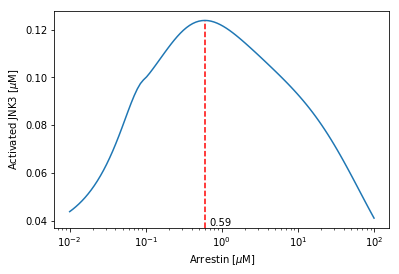

In [3]:
# Generating parameter with different initial conditions
# for arrestin

tspan = np.linspace(0, 180, 181)

n_conditions = 100
max_arrestin = 100
arrestin_initials = np.logspace(-2, 2, n_conditions)
arrestin_initials = arrestin_initials
par_clus1 = par_set_calibrated

arrestin_idx = 44
kcat_idx = [36, 37]

repeated_parameter_values = np.tile(par_clus1, (n_conditions, 1))
repeated_parameter_values[:, arrestin_idx] = arrestin_initials
np.save('arrestin_diff_IC_par0.npy', repeated_parameter_values)

time_eq = np.linspace(0, 2000, 200)
pars_ic_eq = np.copy(repeated_parameter_values)
pars_ic_eq[:, kcat_idx] = 0  # Setting catalytic reactions to zero for pre-equilibration
eq_conc = pre_equilibration(model, time_eq, pars_ic_eq)[1]

sim1 = ScipyOdeSimulator(model=model, tspan=tspan).run(param_values=repeated_parameter_values, initials=eq_conc).all

# [print(s['all_jnk3'][10]) for s in sim1]
ppjnk3 = np.array([s['all_jnk3'][24] for s in sim1])
print(tspan[24])
ppjnk3_max_idx = np.argmax(ppjnk3)

plt.semilogx(arrestin_initials, ppjnk3)
plt.axvline(arrestin_initials[ppjnk3_max_idx], color='r', linestyle='dashed', ymax=0.95)
locs, labels = plt.xticks()
locs = np.append(locs, np.log10(arrestin_initials[ppjnk3_max_idx]))
# plt.xticks(locs)
# plt.xlim(0, max_arrestin)
plt.text(arrestin_initials[ppjnk3_max_idx]+0.08, 0.038, str(arrestin_initials[ppjnk3_max_idx])[:4])
plt.xlabel(r'Arrestin [$\mu$M]')
plt.ylabel(r'Activated JNK3 [$\mu$M]')